In [32]:
import os 

# parh, dirs, files = next(os.walk("train"))

# print("There is")
# print(len(files))
# print(files)


In [33]:
files_names = os.listdir("train")[:2000]
print(files_names[0])

dog.8011.jpg


In [34]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg 

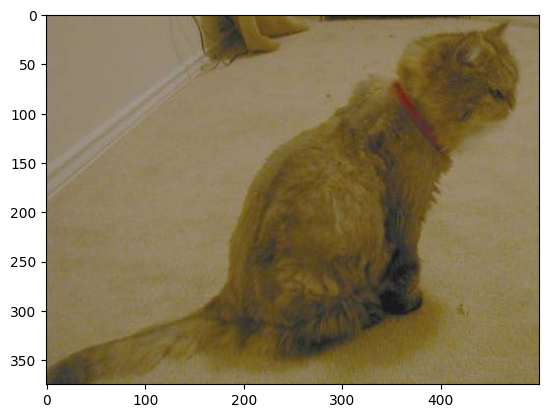

In [35]:
cat = mpimg.imread("train/cat.10145.jpg")
plt.imshow(cat)
plt.show()

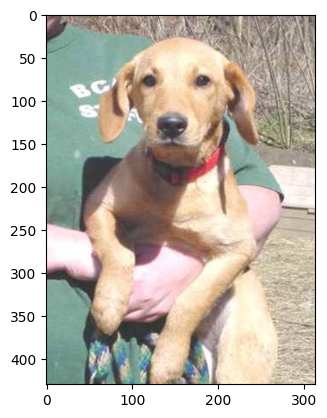

In [36]:
dog = mpimg.imread("train/dog.10145.jpg")
plt.imshow(dog)
plt.show()

In [37]:
dog_files = []
cat_files = []

labels = []

for file_name in files_names:
    if file_name.startswith("cat"):
        cat_files.append(file_name)

        labels.append(0)
    elif file_name.startswith("dog"):
        dog_files.append(file_name)

        labels.append(1)
        
print((len(dog_files)))
print((len(cat_files)))

1014
986


In [38]:
import PIL

for file_name in files_names:
    img = PIL.Image.open("train/" + file_name)
    img = img.resize((224, 224))
    img = img.convert("RGB")
    
    img.save("resized/" + file_name)


In [39]:
import cv2
import glob
import numpy as np

dog_cat_images = []
files = []

for file_name in files_names:
    dog_cat_images.append(cv2.imread("resized/" + file_name))

dog_cat_images = np.asarray(dog_cat_images)


In [40]:
from sklearn.model_selection import train_test_split

labels= np.asarray(labels)

x_train, x_test, y_train, y_test = train_test_split(dog_cat_images, labels, test_size=0.2, random_state=2)

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [41]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [42]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(x_train_scaled, y_train, epochs=5)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
50/50 [==============================] - 9s 144ms/step - loss: 0.2128 - acc: 0.9137
Epoch 2/5
50/50 [==============================] - 8s 152ms/step - loss: 0.0710 - acc: 0.9737
Epoch 3/5
50/50 [==============================] - 8s 152ms/step - loss: 0.0518 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 7s 140ms/step - loss: 0.0411 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 7s 137ms/

In [43]:
score, acc = model.evaluate(x_test, y_test)
print("Test Loss =", score)
print("")

13/13 [==============================] - 2s 134ms/step - loss: 0.9210 - acc: 0.5475
Test Loss = 0.9209625124931335



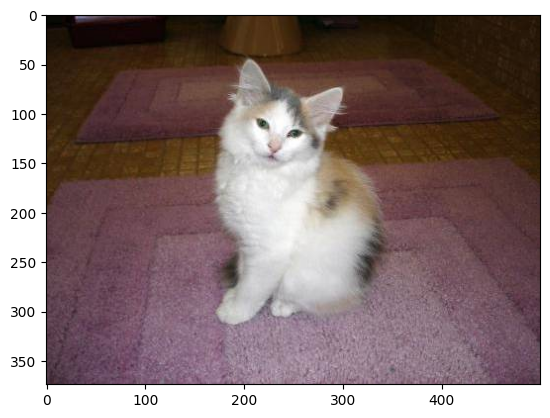

In [52]:
user_image = input("Give me a number between 1 and 12500")
image_number = mpimg.imread(f"test1/{user_image}.jpg")
plt.imshow(image_number)
plt.show()

In [53]:
input_image = cv2.imread(f"test1/{user_image}.jpg")
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshape = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 26ms/step
[[ 4.3740063 -4.560493 ]]


In [55]:
cat_or_dog = np.argmax(input_prediction)

print(cat_or_dog)

if cat_or_dog ==0:
    print("😸")
elif cat_or_dog ==1:
    print("🐶")

0
😸
